## **REGRESSION MODELS**

In [1]:
# I checked warnings, but for the final report I prefer ignore those 
#that really does not affect the results (warnings of libraries, etc)
import warnings
warnings.simplefilter('ignore')

In [2]:
## **LOAD PACKAGES**

import pandas as pd
import os
from datetime import datetime
import numpy as np

#Sometimes I will use R functions (those I believe are the best ones)
# Load in the r magic
%load_ext rpy2.ipython

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Sometimes I will use R functions (those I believe are the best ones)
# Load in the r magic
%load_ext rpy2.ipython
%R require(ggplot2)
%R require(dplyr)
%R require(data.table)
%R require(cowplot)

# own functions 
%R source('utils/Rgraphs.R')

R[write to console]: Loading required package: ggplot2

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: data.table

R[write to console]: 
Attaching package: ‘data.table’


R[write to console]: The following objects are masked from ‘package:dplyr’:

    between, first, last


R[write to console]: Loading required package: cowplot

R[write to console]: 
********************************************************

R[write to console]: Note: As of version 1.0.0, cowplot does not change the

R[write to console]:   default ggplot2 theme anymore. To recover the previous

R[write to console]:   behavior, execute:
  theme_set(theme_cowplot())

R[write to console]: ********************************************************




value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


In [5]:
#load treated and aggregated datas
df = pd.read_csv('data/eng_data.csv') 
df_topic = pd.read_csv('data/topic_data.csv') 

In [6]:
df = pd.merge(df, df_topic, on = 'url_title', how = 'left')
print(df.shape)
df = df.select_dtypes(include=[np.int, np.float])
print(df.shape)

(9860, 21)
(9860, 17)


In [7]:
pd.set_option('display.max_rows', 500)
df.dtypes

Sessions             float64
Avg. Time on Page      int64
Bounce Rate          float64
Page Views           float64
Unique Page Views    float64
Users                float64
content_length         int64
month                  int64
mobile                 int64
tablet                 int64
(direct)               int64
goog                   int64
nkedin                 int64
t.co                   int64
spain                  int64
united states          int64
Topic                float64
dtype: object

In [8]:
# result can be used w/ seaborn's heatmap
def compute_correlation_matrix(df, method='pearson'):
    import pandas as pd
    corr_mat = df.corr()
    return corr_mat

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
cr = compute_correlation_matrix(df)

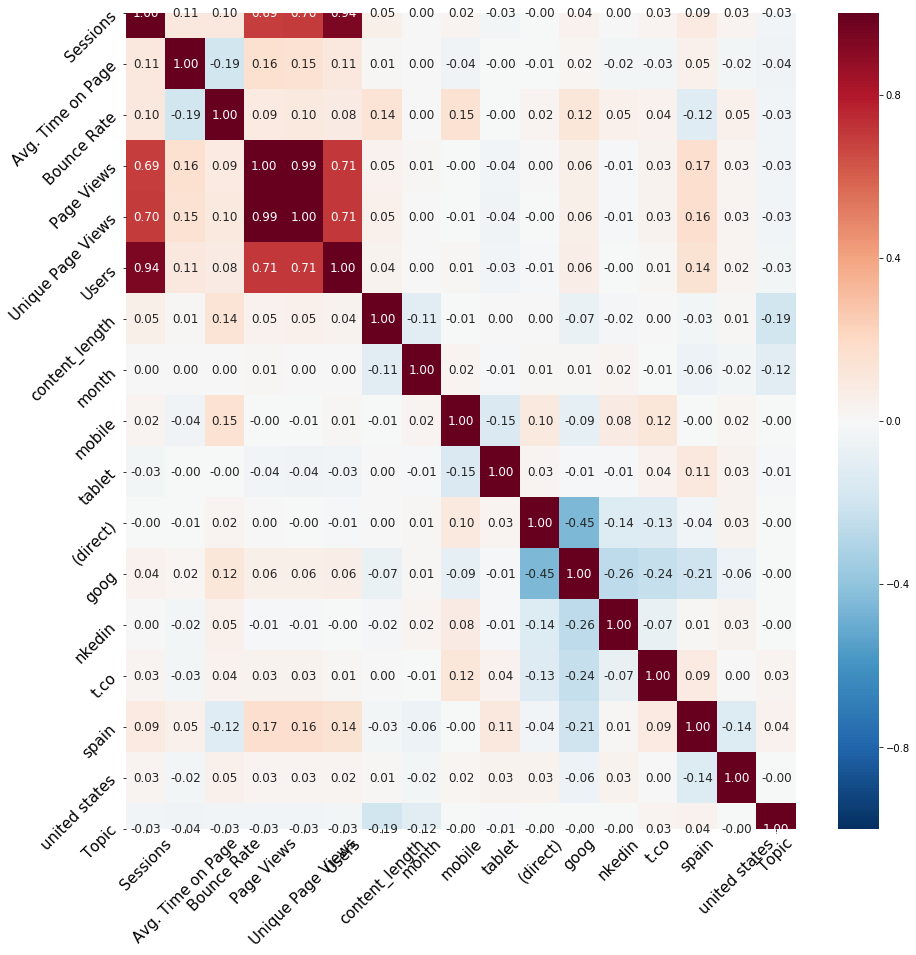

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
b = sns.heatmap(cr,  vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", annot_kws={"size": 12}, ax= ax, cmap="RdBu_r")
b.tick_params(labelsize=15)
plt.yticks(rotation=45) 
plt.xticks(rotation=45) 
plt.show()

In [12]:
#topics in other languages
df["Topic"] = pd.to_numeric(df.Topic, errors='coerce').fillna(7).astype(int)
#one hot encoding of topic
df_topic = pd.get_dummies(df['Topic'],drop_first=True, prefix='Topic')
# concatenate data.frames
frames = [df, df_topic]
df = pd.concat(frames, axis = 1) #, sort= True
df = df.drop(columns = ['Topic'])

In [13]:
## eliminate correlated columns
df = df.drop(columns = ['Unique Page Views', 'Users'])

## **LOG TRANSFORMATION**

In [14]:
#log transformations
df['Avg_Time_Page'] = df['Avg. Time on Page']
df['log_Avg_Time_Page'] = np.log(df['Avg_Time_Page'] + 10)
df = df.drop(columns = ['Avg_Time_Page', 'Avg. Time on Page'])

In [15]:
df['log_Avg_Time_Page'].describe()

count    9860.000000
mean        3.257845
std         1.376562
min         2.302585
25%         2.302585
50%         2.302585
75%         4.143135
max         7.501082
Name: log_Avg_Time_Page, dtype: float64

In [16]:
df.describe()

,Sessions,Bounce Rate,Page Views,content_length,month,mobile,tablet,(direct),goog,nkedin,...,spain,united states,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,log_Avg_Time_Page
count,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,...,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000
mean,2.936540,0.615798,4.088746,6765.640568,6.690061,0.265010,0.062069,0.191684,0.460041,0.075659,...,0.208418,0.068864,0.135497,0.054970,0.058824,0.156897,0.110446,0.179513,0.186917,3.257845
std,13.995351,0.457958,12.207486,5331.235884,3.452558,0.441361,0.241293,0.393645,0.498426,0.264466,...,0.406198,0.253236,0.342271,0.227932,0.235306,0.363722,0.313461,0.383801,0.389865,1.376562
min,0.000000,0.000000,0.000000,372.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585
25%,0.000000,0.000000,1.000000,3477.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585
50%,1.000000,1.000000,1.000000,4872.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585
75%,2.000000,1.000000,3.000000,9243.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.143135
max,967.000000,1.000000,382.000000,27307.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.501082


## CORRELATIONS: CONTINOUS VARIABLES + ITERACTIONS



* We will explore interactions between continuous variables, in order to see if we can get more information, that help us to improve our predictions.

* We well see which variables have high correlation with the variable we want to predict
* We want to avoid multicolineallity, for this we eliminate those explanatory variables that have high correlations between them.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
cr = compute_correlation_matrix(df)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

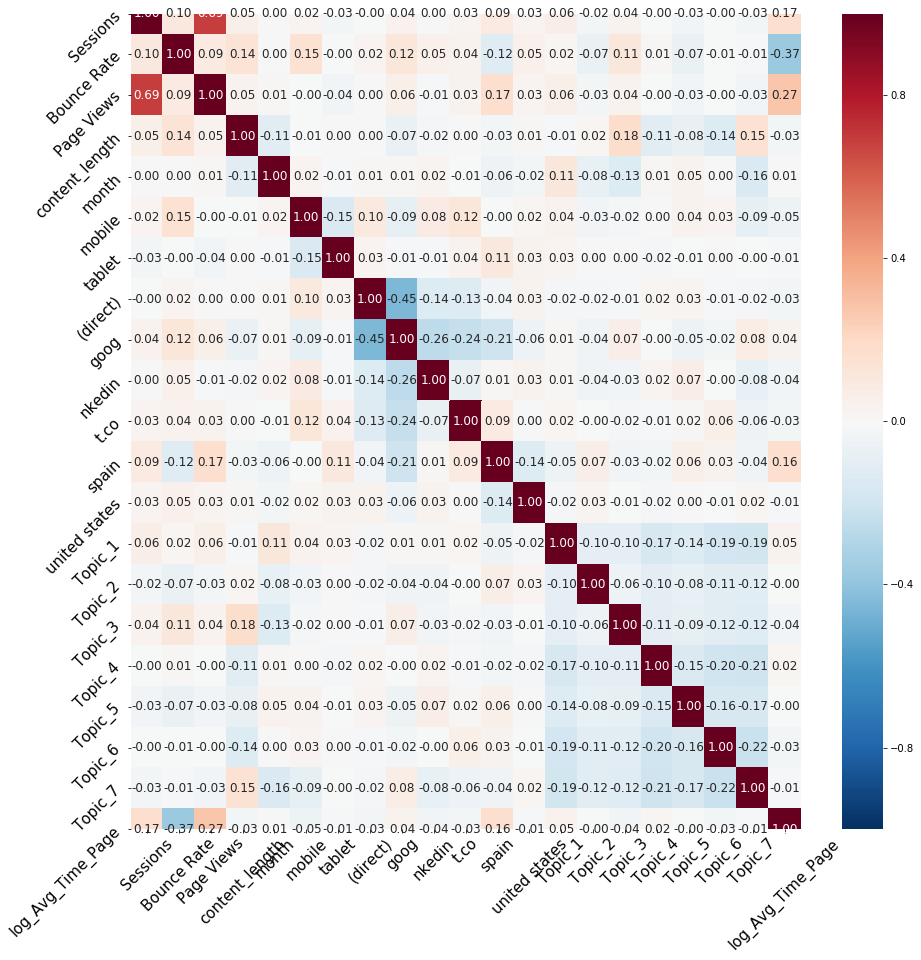

In [18]:

fig, ax = plt.subplots(figsize=(15,15))
b = sns.heatmap(cr,  vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", annot_kws={"size": 12}, ax= ax, cmap="RdBu_r")
b.tick_params(labelsize=15)
plt.yticks(rotation=45) 
plt.xticks(rotation=45) 


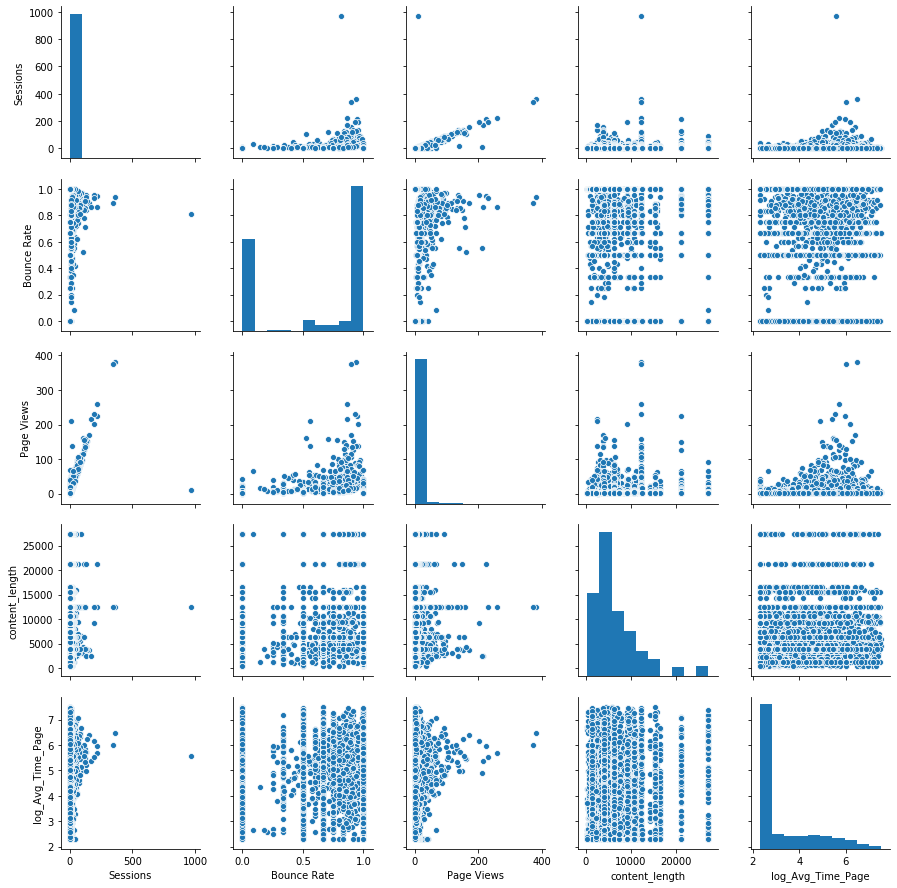

In [19]:
# numerical variables
columns = ['Sessions', 'Bounce Rate', 'Page Views', 'content_length', 'log_Avg_Time_Page']
sns.pairplot(df[columns])#

## **OTHER ALTERNATIVES OF FEATUREING SELECTION**

we can also measure the **MUTUAL INFORMATION** information that exists between the variables and the target (poor/not poor) to select the variables. 

In [20]:
from sklearn.feature_selection import mutual_info_regression
#from sklearn.feature_extraction.text import get_feature_names
Y = df['log_Avg_Time_Page']
X = df.drop(columns = 'log_Avg_Time_Page')
dx = dict(zip(X.columns, mutual_info_regression(X, Y)))
dd = pd.DataFrame(dx, index=[1]).transpose()

R[write to console]: Saving 12.5 x 6.94 in image



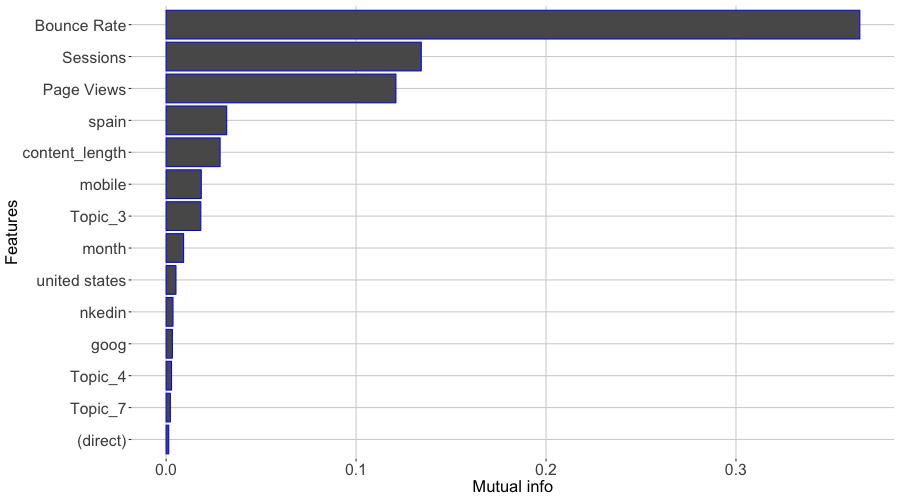

In [21]:
%%R -i dd -w 900 -h 500 -u px

d = Mutual_info(dd)
print(d)
ggsave('fig/mutual_info_classif.png')

## **DIVISION IN TRAINING AND TEST**

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
test_y = test['log_Avg_Time_Page'] 
test = test.drop(columns = ['log_Avg_Time_Page'])

In [23]:
train.head()

,Sessions,Bounce Rate,Page Views,content_length,month,mobile,tablet,(direct),goog,nkedin,...,spain,united states,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,log_Avg_Time_Page
8351,2.0,1.0000,2.0,3046,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2.302585
4178,0.0,0.0000,1.0,3372,9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.302585
2392,3.0,0.3333,3.0,3052,5,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3.091042
6748,2.0,1.0000,2.0,9675,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2.302585
8708,2.0,1.0000,3.0,9447,3,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4.927254


In [24]:
#missing
missing = (df.isnull().sum(axis = 0)/df.shape[0])*100
missing = missing.apply(pd.to_numeric)
missing= pd.DataFrame(missing)
missing.head()

,0
Sessions,0.0
Bounce Rate,0.0
Page Views,0.0
content_length,0.0
month,0.0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train, test = train_test_split(df, test_size=0.2)
# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(train)

(-2, 2)

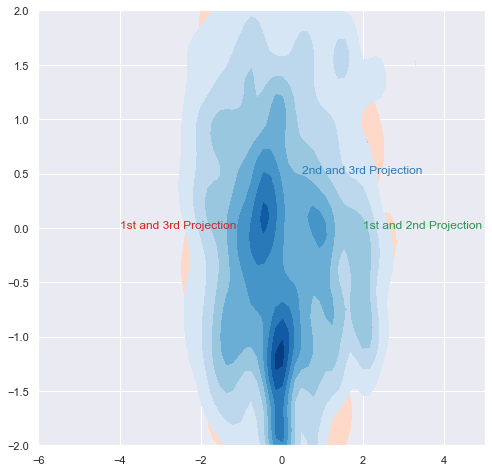

In [26]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_std)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

## **REGRESSIONS**

In [27]:
y_train = train['log_Avg_Time_Page'] 
x_train = train.drop(columns = ['log_Avg_Time_Page'])
y_test  = test['log_Avg_Time_Page'] 
x_test  = test.drop(columns = ['log_Avg_Time_Page'])

y_Train=list(y_train)

In [28]:
def error_comparison(y_predict, y_Train, method = 'Ridge', data_t = 'training'):
    
    #transform
    y_predict = np.exp(y_predict) - 10
    y_Train = np.exp(y_Train) - 10
    
    
    error=0
    mae_sum = 0
    mse_sum = 0
    for i in range(len(y_Train)):
        mae_sum += abs(y_Train[i]-y_predict[i])
        error+=(abs(y_Train[i]-y_predict[i])/y_predict[i])
        mse_sum += (y_Train[i]-y_predict[i])**2
    train_error_ridge= 100 - error/len(y_Train)*100
    mae = mae_sum/len(y_Train)
    rmse = np.sqrt(mse_sum/len(y_Train))
    #print(data_t + " error = "'{}'.format(train_error_ridge)+" mape percent in " + method + " Regression")
    print(data_t + " error = "'{}'.format(mae)+" mae in " + method + "Regression")
    print(data_t + " error = "'{}'.format(rmse)+" rmse in " + method + "Regression")

    return train_error_ridge, mae, rmse

## **Modelling**

In [29]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## **RIDGE**

In [30]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline

In [31]:
# RANDON SEARCH
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

print("-- Random Parameter Search via 10-fold CV")

# dict of parameter list/distributions to sample
param_dist = { "fit_intercept": ["True", "False"],
                  "alpha": range(1, 15),
                  "solver": ["auto", "svd", "cholesky", "lsqr"], 
                  "normalize": ["True", "False"]
             }
ridge = linear_model.Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_dist, cv=10)
X = ridge_cv.fit(x_train,y_train)

-- Random Parameter Search via 10-fold CV


In [32]:
print(ridge_cv.best_score_)
print(ridge_cv.best_params_)
print(ridge_cv.best_estimator_)

0.13436134144913062
{'solver': 'auto', 'normalize': 'True', 'fit_intercept': 'False', 'alpha': 2}
Ridge(alpha=2, copy_X=True, fit_intercept='False', max_iter=None,
   normalize='True', random_state=None, solver='auto', tol=0.001)


In [33]:
model = Pipeline([('scaler', StandardScaler()),
                  #('ridge', linear_model.Ridge(solver= "lsqr", normalize= 'True', fit_intercept= 'False', alpha= 7))
                  ('ridge', linear_model.Ridge(solver= "auto", normalize= 'True', fit_intercept= 'False', alpha= 2))
                 ])
model.fit(x_train,y_train)
y_predict=model.predict(x_train)

ridge_percent, ridge_mae, ridge_mse = error_comparison(y_predict, y_Train)

training error = 84.39123649474062 mae in RidgeRegression
training error = 219.90902403499712 rmse in RidgeRegression


[[1.         0.47810316]
 [0.47810316 1.        ]]


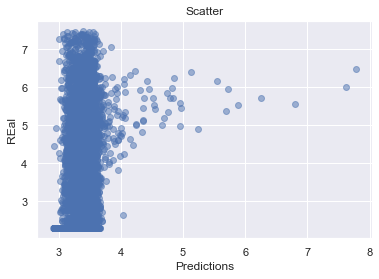

In [34]:
print(np.corrcoef(y_predict, y_Train))
# Plot
plt.scatter(y_predict, y_Train, alpha=0.5)
plt.title('Scatter')
plt.xlabel('Predictions')
plt.ylabel('REal')
plt.show()

In [35]:
cols = x_train.columns
coef = pd.DataFrame(model.named_steps['ridge'].coef_)
coef['names'] = cols
coef.columns = ['weights', 'names']

R[write to console]: Saving 12.5 x 13.9 in image



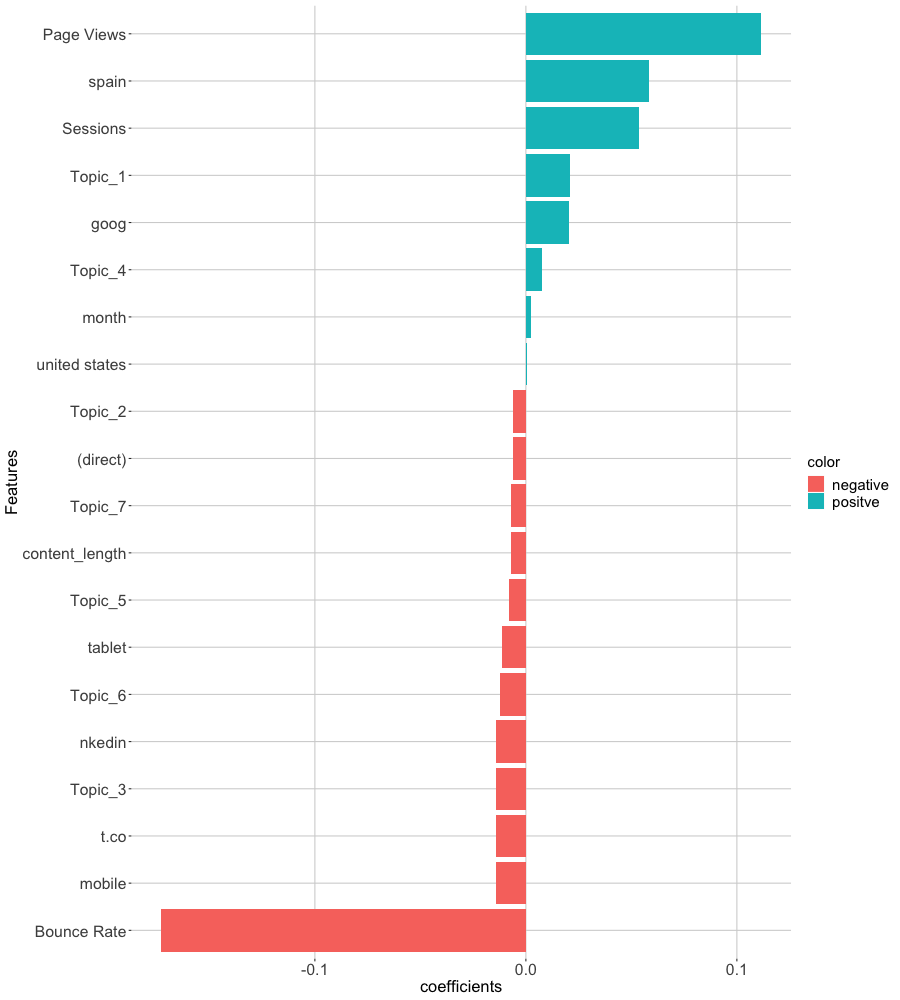

In [36]:
%%R -i coef -w 900 -h 1000 -u px

dt.values = as.data.table(coef)
names(dt.values) = c( 'value', 'Var1')
dt.values = dt.values[order(value, decreasing = T),]
dt.values = dt.values %>% mutate(color = ifelse(value <= 0,  'negative', 'positve'))

d <- ggplot(dt.values, aes(y = value, x = reorder(Var1, value), fill = color)) +  geom_bar(stat = "identity") + coord_flip()
d <- d + ylab('coefficients') + xlab('Features') 
  #d <- d +  theme_tq() 
d <- d + theme(axis.title.y = element_text(size = rel(1.5)))
d <- d + theme(axis.text.y = element_text(size = rel(1.8)))
d <- d + theme(axis.text.x = element_text(size = rel(1.8)))
d <- d + theme(axis.title.x = element_text(size = rel(1.5)))
d <- d + theme(legend.text = element_text(size = 15))
d <- d + theme(legend.title = element_text(size = 15))
d <- d +  theme(
    panel.background = element_rect(fill="white") ,
    panel.grid.minor.y = element_line(size=3),
    panel.grid.major = element_line(colour = "lightgray"),
    plot.background = element_rect(fill="white")
  )

ggsave('fig/ridge_importance.png')
d

In [37]:
y_Predict=model.predict(x_test)
y_Predict[y_Predict < 0] = 0

In [38]:
Y_test=list(y_test)

t_ridge_percent, t_ridge_mae, t_ridge_mse = error_comparison(y_Predict, Y_test, method = 'Ridge', data_t = 'test')

test error = 80.45045288612427 mae in RidgeRegression
test error = 218.58397470065935 rmse in RidgeRegression


[[1.         0.52485005]
 [0.52485005 1.        ]]


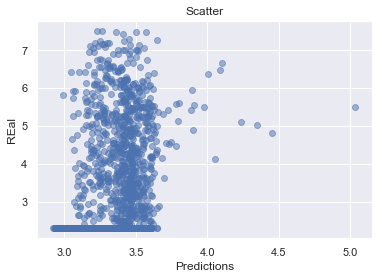

In [39]:
print(np.corrcoef(y_Predict, Y_test))
# Plot
plt.scatter(y_Predict, Y_test, alpha=0.5)
plt.title('Scatter')
plt.xlabel('Predictions')
plt.ylabel('REal')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

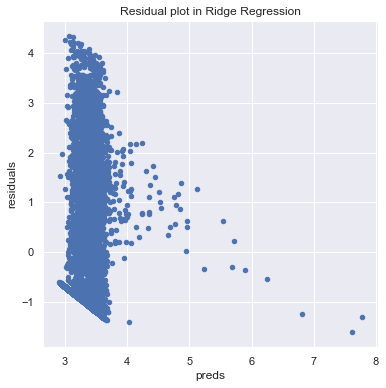

In [40]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

## **Knn Algorithm**

In [41]:
from sklearn.pipeline import Pipeline
from sklearn import neighbors

In [42]:
print("-- Random Parameter Search via 10-fold CV")

# dict of parameter list/distributions to sample
param_dist = {"algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
              "leaf_size": randint(10, 50),
              "n_neighbors": randint(1, 5),
              "weights": ["uniform", "distance"],
              "p": randint(1, 4),
              
             }
neighbors = neighbors.KNeighborsRegressor()
neighbors_cv = RandomizedSearchCV(neighbors, param_dist, cv=10)
X = neighbors_cv.fit(x_train,y_train)


-- Random Parameter Search via 10-fold CV


In [43]:
print(neighbors_cv.best_score_)
print(neighbors_cv.best_params_)
print(neighbors_cv.best_estimator_)

0.24072065874710608
{'algorithm': 'kd_tree', 'leaf_size': 24, 'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
KNeighborsRegressor(algorithm='kd_tree', leaf_size=24, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=3,
          weights='uniform')


In [44]:
from sklearn import neighbors
knn = Pipeline([('scaler', StandardScaler()),
                 ('knn', neighbors.KNeighborsRegressor(n_neighbors = 4,weights='uniform'))
                #('knn', neighbors.KNeighborsRegressor(n_neighbors = 4, p = 1, weights='uniform', algorithm= "ball_tree", leaf_size =  45))
               ])
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)

knn_percent, knn_mae, knn_mse  = error_comparison(y1_knn, y_Train, method = 'Knn', data_t = 'training')

training error = 68.50072238973145 mae in KnnRegression
training error = 193.67523834196064 rmse in KnnRegression


In [45]:
y2_knn=knn.predict(x_test)
y2_knn[y2_knn < 0] = 0
y2_knn=list(y2_knn)
t_knn_percent, t_knn_mae, t_knn_mse = error_comparison(y2_knn, Y_test, method = 'Knn', data_t = 'test')

test error = 75.19604793006485 mae in KnnRegression
test error = 208.31458033609323 rmse in KnnRegression


[[1.         0.55599805]
 [0.55599805 1.        ]]


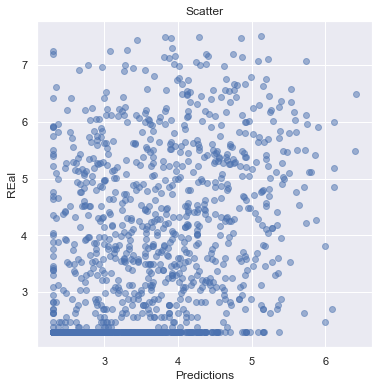

In [46]:
print(np.corrcoef(y2_knn, Y_test))
# Plot
plt.scatter(y2_knn, Y_test, alpha=0.5)
plt.title('Scatter')
plt.xlabel('Predictions')
plt.ylabel('REal')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Knn')

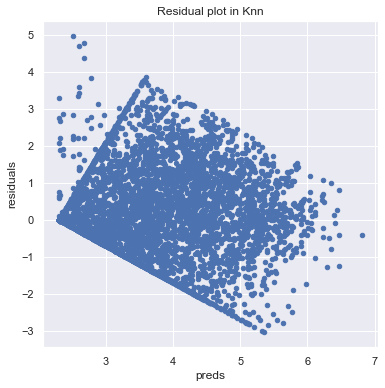

In [47]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

## **Bayesian Regression**

In [48]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline

In [49]:
distribution = [i/1e5 for i in range (1,100)]

In [50]:
# RANDON SEARCH

print("-- Random Parameter Search via 10-fold CV")

# dict of parameter list/distributions to sample
param_dist = {"fit_intercept": [True, False],
               "normalize" : [True, False],
                  "alpha_1": distribution,
                  "alpha_2": distribution,
                  "lambda_1": distribution,
                  "lambda_2": distribution                
             }
bayes = linear_model.BayesianRidge()
bayes_cv = RandomizedSearchCV(bayes, param_dist, cv=10)
X = bayes_cv.fit(x_train,y_train)

-- Random Parameter Search via 10-fold CV


In [51]:
print(bayes_cv.best_score_)
print(bayes_cv.best_params_)
print(bayes_cv.best_estimator_)

0.22006437998581027
{'normalize': True, 'lambda_2': 0.00099, 'lambda_1': 0.00096, 'fit_intercept': True, 'alpha_2': 0.00028, 'alpha_1': 0.00058}
BayesianRidge(alpha_1=0.00058, alpha_2=0.00028, compute_score=False,
       copy_X=True, fit_intercept=True, lambda_1=0.00096, lambda_2=0.00099,
       n_iter=300, normalize=True, tol=0.001, verbose=False)


In [52]:
'''
from sklearn import linear_model
from sklearn.pipeline import Pipeline
reg = Pipeline([('scaler', StandardScaler()),
                  ('bayes', linear_model.BayesianRidge())])
reg.fit(x_train,y_train)
'''

"\nfrom sklearn import linear_model\nfrom sklearn.pipeline import Pipeline\nreg = Pipeline([('scaler', StandardScaler()),\n                  ('bayes', linear_model.BayesianRidge())])\nreg.fit(x_train,y_train)\n"

In [53]:
reg = linear_model.BayesianRidge(normalize= True, lambda_2= 0.00099, lambda_1 = 0.00096, fit_intercept = True, alpha_2 =0.00028, alpha_1= 0.00058)
reg.fit(x_train,y_train)
y1_reg=reg.predict(x_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(x_test)
y2_reg=list(y2_reg)

In [54]:
bayes_percent, bayes_mae, bayes_mse = error_comparison(y1_reg, y_Train, method = 'Bayes', data_t = 'training')

training error = 399.1745581710323 mae in BayesRegression
training error = 19091.518796999182 rmse in BayesRegression


In [55]:
y2_reg=reg.predict(x_test)
y2_reg[y2_reg < 0] = 0
y2_reg=list(y2_reg)

In [56]:
t_bayes_percent, t_bayes_mae, t_bayes_mse = error_comparison(y2_reg, Y_test, method = 'Bayes', data_t = 'test')

test error = 78.2121105181395 mae in BayesRegression
test error = 221.2184340109974 rmse in BayesRegression


[[1.         0.52596119]
 [0.52596119 1.        ]]


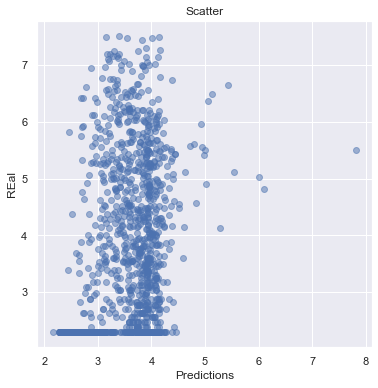

In [57]:
print(np.corrcoef(y2_reg, Y_test))
# Plot
plt.scatter(y2_reg, Y_test, alpha=0.5)
plt.title('Scatter')
plt.xlabel('Predictions')
plt.ylabel('REal')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

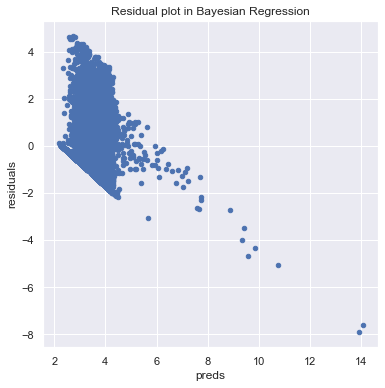

In [58]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":reg.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

In [59]:
x_train.head()

,Sessions,Bounce Rate,Page Views,content_length,month,mobile,tablet,(direct),goog,nkedin,t.co,spain,united states,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7
3675,0.0,0.0,1.0,2967,10,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1564,1.0,1.0,1.0,4732,7,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6348,2.0,1.0,2.0,5943,3,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1709,2.0,1.0,2.0,6537,9,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6914,0.0,0.0,1.0,15478,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## **Decision Tree Regressor**

In [129]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1) #improve increase max_depth = 1
dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec[y2_dec < 0] = 0
y2_dec=list(y2_dec)

In [133]:
dec

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [130]:
dt_percent, dt_mae, dt_mse = error_comparison(y1_dec, y_Train, method = 'Decision Tree', data_t = 'training')
t_dt_percent, t_dt_mae, t_dt_mse = error_comparison(y2_dec, Y_test, method = 'Decision', data_t = 'test')

training error = 70.21643449213636 mae in Decision TreeRegression
training error = 197.8868093037919 rmse in Decision TreeRegression
test error = 68.58199512031804 mae in DecisionRegression
test error = 200.53293920103033 rmse in DecisionRegression


[[1.         0.73428145]
 [0.73428145 1.        ]]


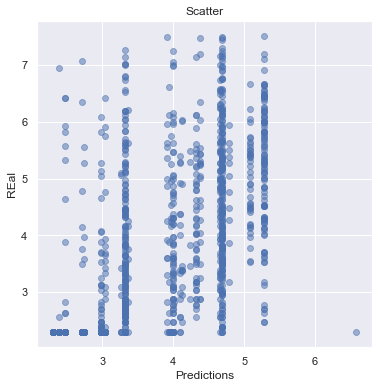

In [131]:
print(np.corrcoef(y2_dec, Y_test))
# Plot
plt.scatter(y2_dec, Y_test, alpha=0.5)
plt.title('Scatter')
plt.xlabel('Predictions')
plt.ylabel('REal')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Decision Tree')

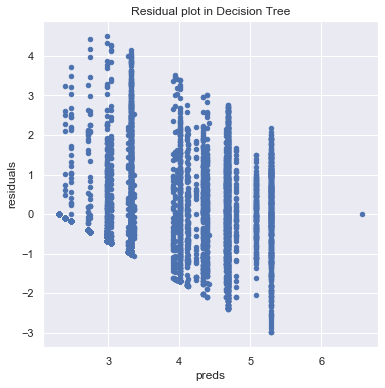

In [132]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

## **SVM**

In [64]:
from sklearn import svm
from sklearn.pipeline import Pipeline

In [65]:

'''
# RANDON SEARCH
print("-- Random Parameter Search via 10-fold CV")

# dict of parameter list/distributions to sample
param_dist = { #"shrinking": [True, False],
               #   "C": randint(1, 5),
                  "tol": distribution  
             }
sv = svm.SVR(kernel='linear')
sv_cv = RandomizedSearchCV(sv, param_dist, cv= 5)
X = sv_cv.fit(x_train,y_train)

print(sv_cv.best_score_)
print(sv_cv.best_params_)
print(sv_cv.best_estimator_)
'''

'\n# RANDON SEARCH\nprint("-- Random Parameter Search via 10-fold CV")\n\n# dict of parameter list/distributions to sample\nparam_dist = { #"shrinking": [True, False],\n               #   "C": randint(1, 5),\n                  "tol": distribution  \n             }\nsv = svm.SVR(kernel=\'linear\')\nsv_cv = RandomizedSearchCV(sv, param_dist, cv= 5)\nX = sv_cv.fit(x_train,y_train)\n\nprint(sv_cv.best_score_)\nprint(sv_cv.best_params_)\nprint(sv_cv.best_estimator_)\n'

In [66]:
model = Pipeline([('scaler', StandardScaler()),
                  ('svr', svm.SVR(kernel='linear', max_iter = 10000,  tol=0.01))])
model.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=10000, shrinking=True, tol=0.01, verbose=False))])

In [67]:
y1_svm=model.predict(x_train)
y1_svm=list(y1_svm)
y2_svm=model.predict(x_test)
y2_svm[y2_svm < 0] = 0
y2_svm=list(y2_svm)

## **IMPORTANCE svm**

In [68]:
model.named_steps['svr'].coef_

array([[-0.01520882, -0.56051554,  0.69592942,  0.00167575, -0.03406328,
         0.05248059,  0.01246013,  0.05342218,  0.13838342,  0.05987452,
         0.02075024,  0.07848264,  0.03000108,  0.03675461,  0.0148117 ,
         0.01648968,  0.02417998, -0.03490838, -0.04808131, -0.04838888]])

In [69]:
cols = x_train.columns
coef = pd.DataFrame(model.named_steps['svr'].coef_)
coef.columns = cols
coef = coef.transpose()

R[write to console]: Saving 12.5 x 13.9 in image



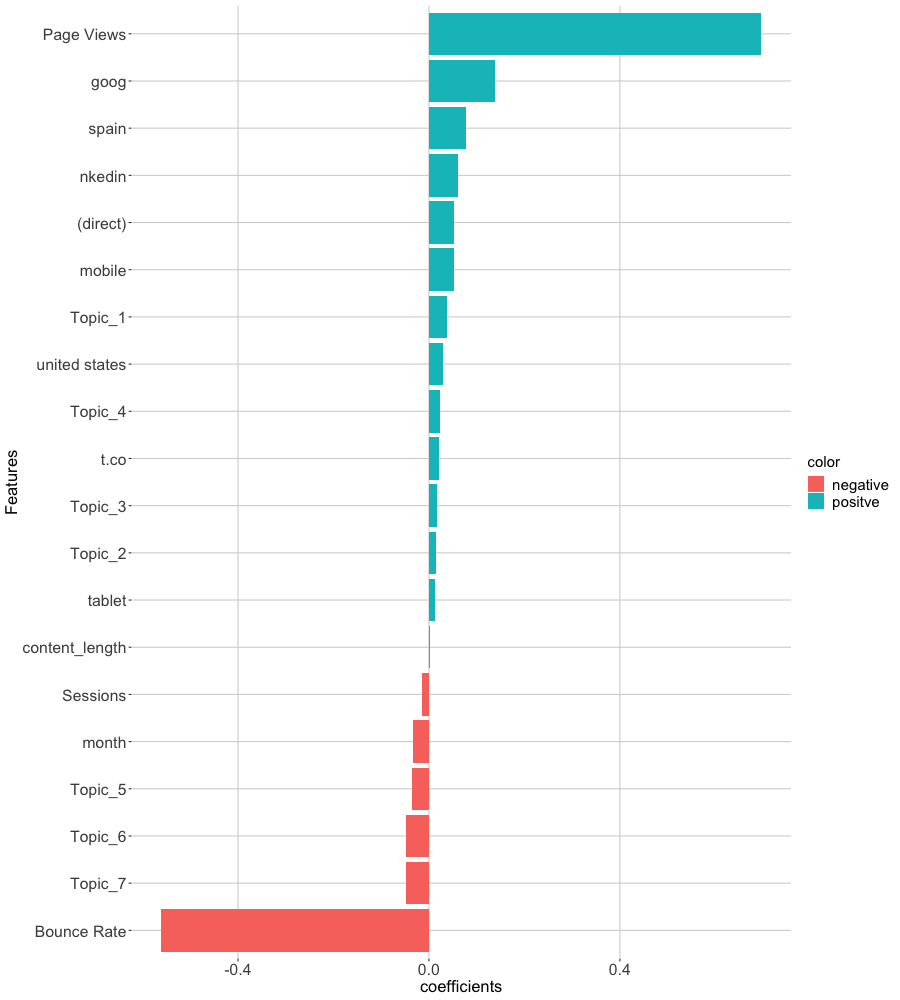

In [70]:
%%R -i coef -w 900 -h 1000 -u px

dt.values = as.data.table(cbind(row.names(coef), coef), row.names = NULL)
names(dt.values) = c('Var1', 'value')
dt.values = dt.values[order(value, decreasing = T),]
dt.values = dt.values %>% mutate(color = ifelse(value <= 0,  'negative', 'positve'))

d <- ggplot(dt.values, aes(y = value, x = reorder(Var1, value), fill = color)) +  geom_bar(stat = "identity") + coord_flip()
d <- d + ylab('coefficients') + xlab('Features') 
  #d <- d +  theme_tq() 
d <- d + theme(axis.title.y = element_text(size = rel(1.5)))
d <- d + theme(axis.text.y = element_text(size = rel(1.8)))
d <- d + theme(axis.text.x = element_text(size = rel(1.8)))
d <- d + theme(axis.title.x = element_text(size = rel(1.5)))
d <- d + theme(legend.text = element_text(size = 15))
d <- d + theme(legend.title = element_text(size = 15))
d <- d +  theme(
    panel.background = element_rect(fill="white") ,
    panel.grid.minor.y = element_line(size=3),
    panel.grid.major = element_line(colour = "lightgray"),
    plot.background = element_rect(fill="white")
  )

ggsave('fig/svm_importance.png')
d

In [71]:
svm_percent, svm_mae, svm_mse = error_comparison(y1_svm, y_Train, method = 'SVM', data_t = 'training')

training error = 1540378.045312393 mae in SVMRegression
training error = 97209124.62090953 rmse in SVMRegression


In [72]:
t_svm_percent, t_svm_mae, t_svm_mse = error_comparison(y2_svm, Y_test, method = 'SVM', data_t = 'test')

test error = 109.15753037727517 mae in SVMRegression
test error = 1454.6919042395712 rmse in SVMRegression


[[1.         0.54447002]
 [0.54447002 1.        ]]


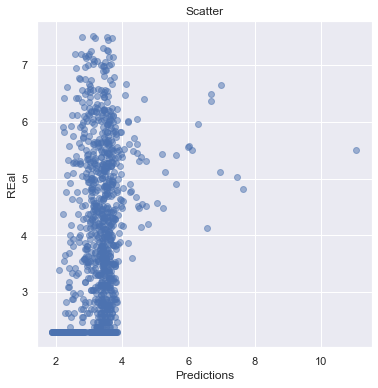

In [73]:
print(np.corrcoef(y2_svm, Y_test))
# Plot
plt.scatter(y2_svm, Y_test, alpha=0.5)
plt.title('Scatter')
plt.xlabel('Predictions')
plt.ylabel('REal')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in SVM')

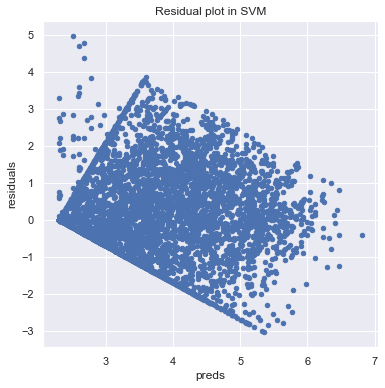

In [74]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

## **xgboost**

In [75]:
import xgboost as xgb

In [76]:
# RANDON SEARCH

print("-- Random Parameter Search via 10-fold CV")

# dict of parameter list/distributions to sample
param_dist = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

xb = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_cv = RandomizedSearchCV(xb, param_dist, cv=10)
X = xgb_cv.fit(x_train,y_train)

-- Random Parameter Search via 10-fold CV


In [77]:
print(xgb_cv.best_score_)
print(xgb_cv.best_params_)
print(xgb_cv.best_estimator_)

0.5450983605582395
{'subsample': 0.7, 'silent': False, 'reg_lambda': 50.0, 'n_estimators': 100, 'min_child_weight': 7.0, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.25, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.9}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.25,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=7.0, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=50.0, scale_pos_weight=1,
       seed=None, silent=False, subsample=0.7, verbosity=1)


In [78]:

#data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',subsample = 0.8, 
                          silent = False, reg_lambda = 50.0, n_estimators = 100, 
                          min_child_weight = 5.0, max_depth = 10, learning_rate = 0.1, 
                          gamma = 1.0, colsample_bytree = 0.7, colsample_bylevel = 0.8)

xg_reg.fit(x_train,y_train)
y1_xg = xg_reg.predict(x_train)
y2_xg = xg_reg.predict(x_test)
y2_xg[y2_xg < 0] = 0

In [79]:
xgb_percent, xgb_mae, xgb_mse = error_comparison(y1_xg, y_Train, method = 'xgb', data_t = 'training')
t_xgb_percent, t_xgb_mae, t_xgb_mse = error_comparison(y2_xg, Y_test, method = 'xgb', data_t = 'test')

training error = 66.20210724101831 mae in xgbRegression
training error = 192.24825482086328 rmse in xgbRegression
test error = 67.93240689264108 mae in xgbRegression
test error = 199.46894280651014 rmse in xgbRegression


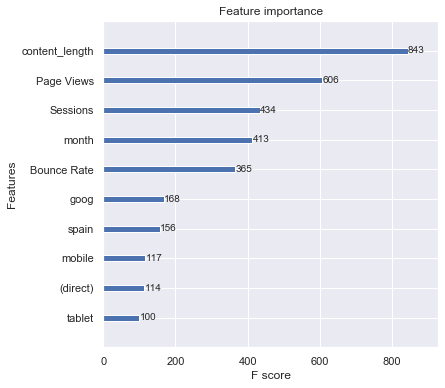

In [80]:
from xgboost import plot_importance
plot_importance(xg_reg, max_num_features=10) # top 10 most important features

In [81]:
eval_set = [(x_train, y_train), (x_test,y_test)]
xg_reg.fit(x_train, y_train,  eval_set=eval_set,  early_stopping_rounds=10, eval_metric=["rmse"], verbose=True)
# make predictions for test data
y_pred = xg_reg.predict(x_test)
predictions = [round(value) for value in y_pred]

[0]	validation_0-rmse:2.84366	validation_1-rmse:2.78252
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:2.61958	validation_1-rmse:2.56195
[2]	validation_0-rmse:2.40689	validation_1-rmse:2.35135
[3]	validation_0-rmse:2.21478	validation_1-rmse:2.16141
[4]	validation_0-rmse:2.04618	validation_1-rmse:1.99465
[5]	validation_0-rmse:1.90027	validation_1-rmse:1.85071
[6]	validation_0-rmse:1.76676	validation_1-rmse:1.71862
[7]	validation_0-rmse:1.64997	validation_1-rmse:1.60351
[8]	validation_0-rmse:1.56163	validation_1-rmse:1.5152
[9]	validation_0-rmse:1.48039	validation_1-rmse:1.43429
[10]	validation_0-rmse:1.39991	validation_1-rmse:1.35543
[11]	validation_0-rmse:1.33351	validation_1-rmse:1.28998
[12]	validation_0-rmse:1.28115	validation_1-rmse:1.23787
[13]	validation_0-rmse:1.22846	validation_1-rmse:1.18677
[14]	validation_0-rmse:1.18556	validation_1-rmse:1.144

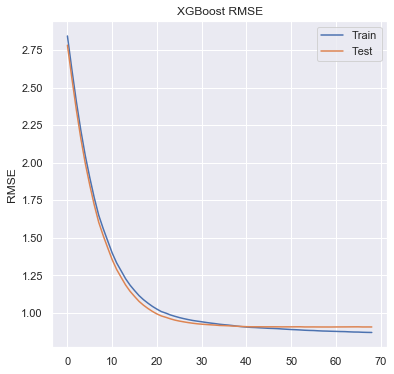

In [82]:
from matplotlib import pyplot
# retrieve performance metrics #xg_reg
results = xg_reg.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

## **ERRORS**

In [83]:
y1_xg = xg_reg.predict(x_train)
y2_xg = xg_reg.predict(x_test)
y2_xg[y2_xg < 0] = 0

In [84]:
xgb_percent, xgb_mae, xgb_mse = error_comparison(y1_xg, y_Train, method = 'xgb', data_t = 'training')
t_xgb_percent, t_xgb_mae, t_xgb_mse = error_comparison(y2_xg, Y_test, method = 'xgb', data_t = 'test')

training error = 68.05134950617506 mae in xgbRegression
training error = 196.28482480703994 rmse in xgbRegression
test error = 67.94378871318051 mae in xgbRegression
test error = 200.55154986818454 rmse in xgbRegression


[[1.         0.74339902]
 [0.74339902 1.        ]]


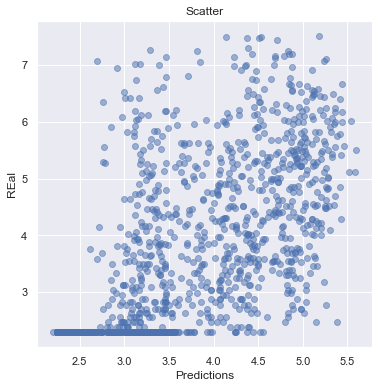

In [85]:
print(np.corrcoef(y2_xg, Y_test))
# Plot
plt.scatter(y2_xg, Y_test, alpha=0.5)
plt.title('Scatter')
plt.xlabel('Predictions')
plt.ylabel('REal')
plt.show()

## **KERAS**

In [93]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [94]:
'''
def baseline_model():
    model = Sequential()
    model.add(Dense(53, input_dim=len(x_train.columns), kernel_initializer='normal', 
        activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics= ['mse']) #adam sgd mae
    return model
seed = 1
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
kfold = KFold(n_splits=10, random_state=seed)

results = cross_val_score(estimator,  x_train, y_train,  cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
'''

'\ndef baseline_model():\n    model = Sequential()\n    model.add(Dense(53, input_dim=len(x_train.columns), kernel_initializer=\'normal\', \n        activation=\'relu\'))\n    model.add(Dense(6, kernel_initializer=\'normal\', activation=\'relu\'))\n    model.add(Dense(1, kernel_initializer=\'normal\'))\n    model.compile(loss=\'mean_squared_error\', optimizer=\'adam\', metrics= [\'mse\']) #adam sgd mae\n    return model\nseed = 1\nestimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)\nkfold = KFold(n_splits=10, random_state=seed)\n\nresults = cross_val_score(estimator,  x_train, y_train,  cv=kfold)\nprint("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))\n'

In [95]:
seed = 1
def baseline_model():
    model = Sequential()
    model.add(Dense(23, input_dim=len(x_train.columns), kernel_initializer='normal', 
        activation='relu'))
    #model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics= ['mse']) #adam sgd mae
    return model

In [96]:
#!pip install -U numpy
#!pip install --upgrade pip
#😂❤️😍👌💕😌👏🏽🤓🤩😰👿🦵🏾💋👰🏻!
#!pip install tensorflow==1.5.0rc3
#!pip install --upgrade numpy
#!pip install --upgrade tensorflow

In [97]:
'''
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#Now when creating your session pass this config to it.
sess = tf.Session(config=config)
'''

'\nimport tensorflow as tf\nconfig = tf.ConfigProto()\nconfig.gpu_options.allow_growth = True\n#Now when creating your session pass this config to it.\nsess = tf.Session(config=config)\n'

In [98]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

In [99]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed) #10

In [100]:
import numpy
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [102]:
results

array([-1.2668022 , -0.92905952, -1.0553203 , -1.1315968 , -1.17116391])

In [103]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x1a47ad5390>)])

In [104]:
predict_train = pd.DataFrame(pipeline.predict(x_train))
predict_test = pd.DataFrame(pipeline.predict(x_test))

In [105]:
dl_percent, dl_mae, dl_mse = error_comparison(list(predict_train[0]), y_Train, method = 'deeplearning', data_t = 'training')
t_dl_percent, t_dl_mae, t_dl_mse = error_comparison(list(predict_test[0]), Y_test, method = 'deeplearning', data_t = 'test')

training error = 77.39257543179191 mae in deeplearningRegression
training error = 515.3299989366046 rmse in deeplearningRegression
test error = 70.59394292612684 mae in deeplearningRegression
test error = 203.63321038477105 rmse in deeplearningRegression


## **COMPARISONS**

In [106]:
# results from h20: notebook 4_prediction_H20
H20_mae   = 67.72660850557324
t_H20_mae = 67.61272952085284
H20_mse   = 197.06747717226975
t_H20_mse = 191.65899203286992

In [107]:
from pandas import DataFrame,Series

train_error= [ridge_mae, knn_mae, dl_mae, dt_mae, xgb_mae, H20_mae] # svm_mae,
test_error= [t_ridge_mae, t_knn_mae, t_dl_mae, t_dt_mae,  t_xgb_mae, t_H20_mae] #t_svm_mae,

col={'Train Error':train_error,'Test Error':test_error}
models=['Ridge Regression','Knn','Deep learning','Decision Tree', 'xgb', 'h20'] #'SVM',
df_error=DataFrame(data=col,index=models)
df_error


,Train Error,Test Error
Ridge Regression,84.391236,80.450453
Knn,68.500722,75.196048
Deep learning,77.392575,70.593943
Decision Tree,79.095671,75.107340
xgb,68.051350,67.943789
h20,67.726609,67.612730


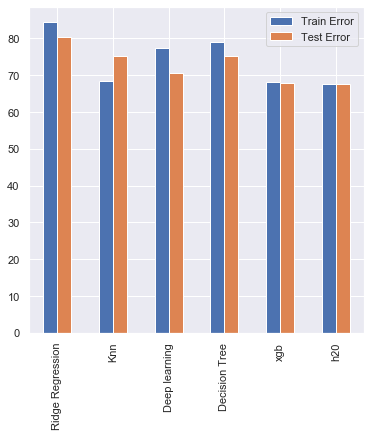

In [108]:
df_error.plot(kind='bar')

In [109]:
## RMSE
train_error= [ridge_mse, knn_mse, dl_mse, dt_mse,  xgb_mse, H20_mse] #svm_mse,
test_error= [t_ridge_mse, t_knn_mse, t_dl_mse, t_dt_mse, t_xgb_mse, t_H20_mse] # t_svm_mse,

col={'Train Error':train_error,'Test Error':test_error}
models=['Ridge Regression','Knn','Deep learning','Decision Tree', 'xgb', 'h20'] #'SVM',
df_error=DataFrame(data=col,index=models)
df_error

,Train Error,Test Error
Ridge Regression,219.909024,218.583975
Knn,193.675238,208.314580
Deep learning,515.329999,203.633210
Decision Tree,210.830866,211.139308
xgb,196.284825,200.551550
h20,197.067477,191.658992


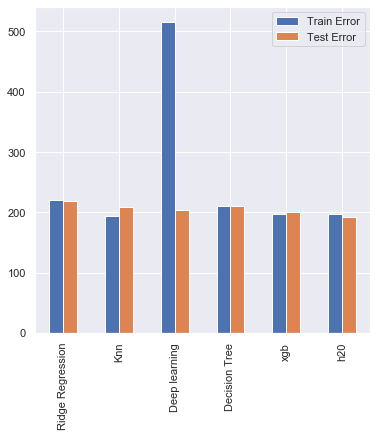

In [110]:
df_error.plot(kind='bar')

## **DENSITY**

In [115]:
from pandas import DataFrame
df_results = DataFrame(y2_xg,columns= ['xgb'])
df_results['real_test'] = Y_test
df_results['ridge'] =y_Predict
df_results['knn'] =y2_knn
df_results['dt'] =y2_dec
df_results['svm'] =y2_svm
df_results['deep'] = predict_test
df_results.shape

df_results['id']=df_results.index

df_results_melt = pd.melt(df_results, id_vars =['id'])

In [116]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


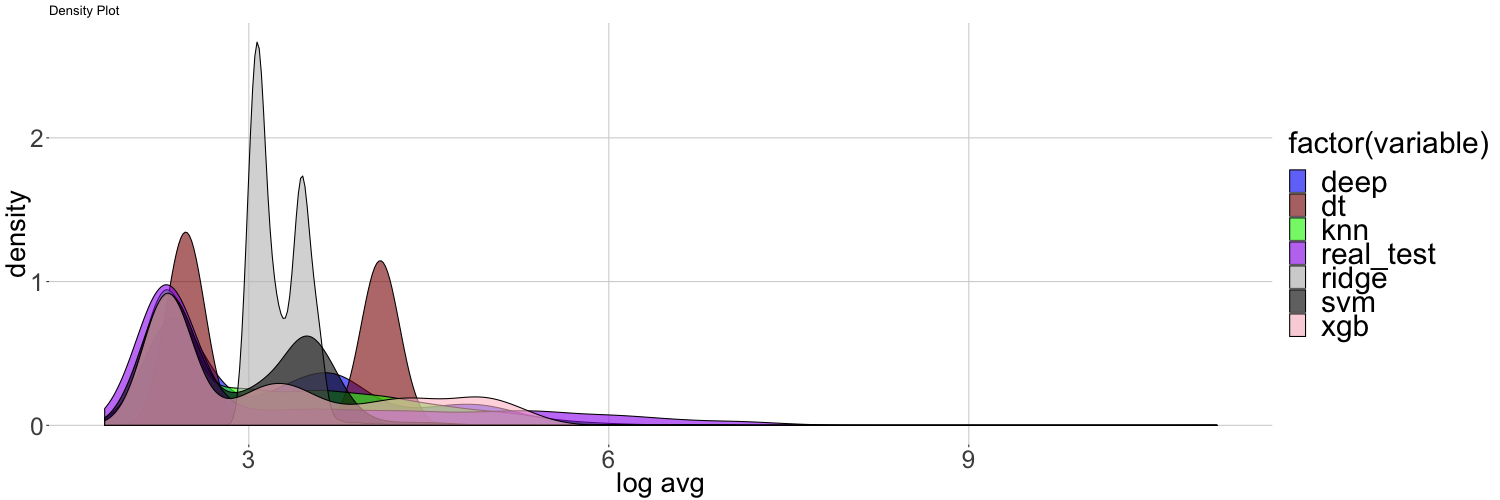

In [120]:
%%R -i df_results_melt -w 1500 -h 500 -u px
d = ggplot(df_results_melt, aes(x=value, fill=factor(variable))) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="log avg")
#d <- d + theme_tq() 
d <- d + theme(axis.title.y = element_text(size = rel(2.5)))
d <- d + theme(axis.text.y = element_text(size = rel(2.8)))
d <- d + theme(axis.text.x = element_text(size = rel(2.8)))
d <- d + theme(axis.title.x = element_text(size = rel(2.5)))
d <- d + theme(legend.text = element_text(size = 30))
d <- d + theme(legend.title = element_text(size = 30))
d <- d +  theme(
        panel.background = element_rect(fill="white") ,
        panel.grid.minor.y = element_line(size=3),
        panel.grid.major = element_line(colour = "lightgray"),
        plot.background = element_rect(fill="white")
      )
d <- d + scale_fill_manual(values=c("blue", "darkred", "green", "purple", "gray",
                                   "black", "pink"))
d

In [119]:
df_results.to_csv(r'data/df_results.csv', index = False)